# Recreating part of Fig. 2 from "Dynamic Analyses of Drosophila Gastrulation Provide Insights into Collective Cell Migration"

In [10]:
import numpy as np
import h5py 
import cv2
import matplotlib.pyplot as plt

with h5py.File('../../CodePass2/runs/finale.hdf5', 'r') as f:
    # read the data
    positions = f['x'][:]
    properties = f['properties'][:][0]
    p = f['p'][:]

In [12]:
xx, yy, zz = positions[0, :, 0], positions[0, :, 1], positions[0, :, 2]

important_part = properties == 1

cyl = positions[:, important_part, :]

In [4]:
l.shape

(3001, 1443)

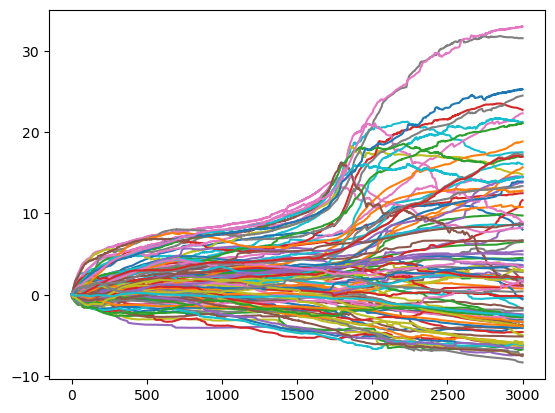

In [13]:
# Transform into cylindrical coordinates

r = np.sqrt(cyl[:, :, 1]**2 + cyl[:, :, 2]**2)
theta = np.arctan2(cyl[:, :, 2], cyl[:, :, 1])
l = cyl[:, :, 0] 

# Plot the trajectory
plt.plot(l[:,:100]-l[0,:100],) 
plt.show()

In [24]:
theta.shape

(3001, 1443)

In [40]:
starts

array([-0.01582902,  2.3925269 ,  0.60583943, -0.48629352, -0.70091605,
       -0.6300134 ,  0.28998208,  2.695918  , -0.74095565,  0.23173735,
        0.36633804,  0.02690862, -2.69554   ,  3.129374  , -0.44168836,
       -2.4390874 ,  0.5472682 ,  0.6327671 , -0.5093304 ,  0.4409859 ,
       -0.3528849 , -3.056104  ,  2.8282146 ,  0.65246224, -0.48576537,
       -2.543387  ,  0.31320637, -2.5345774 ,  2.8659532 , -0.44659176,
        0.40429348,  0.25796416, -2.7849312 ,  0.06694413, -2.5568793 ,
        0.43820295,  0.10518394,  0.22446066, -0.67084634, -2.734809  ,
        3.0823674 ,  2.9672515 , -0.64403105,  2.6206396 ,  0.18139471,
       -2.7071044 ,  2.7181091 ,  2.9702015 , -2.9566863 , -3.067284  ,
       -0.5181141 , -0.33349806, -0.43679142, -0.6716038 , -2.8697412 ,
       -2.45959   ,  0.03256742,  2.6224182 , -0.5555318 ,  0.5485726 ,
        2.939097  , -3.082959  ,  3.0608523 , -0.45235005, -0.30600318,
       -2.8349087 , -2.521298  , -2.5858977 , -0.3962423 ,  2.70

In [45]:
trip[1,:]

array([-7.8697875e-04,  3.8747787e-03,  5.6105852e-04, -1.8438488e-02,
       -2.4341464e-02, -2.8333068e-03, -1.7720759e-03,  1.2881756e-03,
       -1.8950284e-02, -7.0345551e-03, -2.0806193e-03, -2.8185938e-03,
        1.7871857e-03, -1.9445419e-03,  4.4268370e-04,  2.4872065e-02,
       -1.4231205e-03, -5.3491592e-03, -5.0109625e-04,  1.6764998e-03,
       -3.1954050e-03,  4.1184425e-03,  7.4863434e-04, -5.9049129e-03,
        5.6868792e-04,  4.4891834e-03,  8.8915229e-04, -1.8262863e-04,
        1.2516975e-04, -2.3713708e-04,  2.8800964e-03, -1.5330315e-04,
        5.2967072e-03,  3.2041222e-04,  4.1348934e-03, -3.1178296e-03,
       -3.2766834e-03,  2.8982908e-03, -1.5850127e-02,  4.2223930e-03,
        3.2997131e-04, -2.2480488e-03, -5.1867962e-03,  1.4462471e-03,
       -1.1423826e-03,  2.3733854e-02,  1.6014576e-03,  9.9563599e-04,
        1.5363693e-03,  2.4993420e-03, -1.3882518e-03, -1.4102459e-03,
        2.7269125e-04, -1.8900931e-02,  8.0347061e-05,  1.7503023e-02,
      

In [ ]:
import seaborn as sns


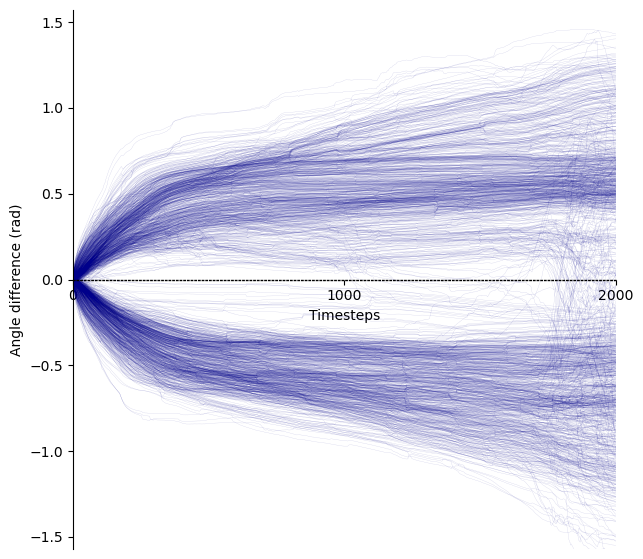

In [108]:
fig = plt.figure(figsize= (7,7))

starts = theta[0,:]

trip = theta[:,:] - starts
# trip[:, np.abs(starts) > np.pi] +=2*np.pi

for i in range(1, len(trip)):
    too_large_step = np.abs(trip[i] - trip[i-1]) > np.pi

    dir = np.sign(trip[i, too_large_step] - trip[i-1, too_large_step])

    trip[i:, too_large_step] -= 2*np.pi*dir

plt.plot(trip, color = 'darkblue', alpha = 0.2, lw = 0.2) 

plt.xlabel('Timesteps')
plt.ylabel('Angle difference (rad)')

# remove the lower 

plt.ylim(-np.pi*0.5, np.pi*0.5)

sns.despine()


# move x-axis to the middle
# plt.gca().spines['left'].set_position('center')
# plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_position('center')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['bottom'].set_linestyle('dotted')

plt.xticks([0, 1000, 2000, 3000,], [0, 1000, 2000, 3000,])

plt.xlim(0,2000)

plt.savefig('../../Figures/the_ring.png', dpi = 300)

plt.show()